In [0]:
import numpy as np
np.set_printoptions(precision=3)
import pandas as pd
pd.set_option('display.precision', 3)
import matplotlib.pyplot as plt

In [0]:
from scipy.stats import binom, beta

In [0]:
# population parameter
p = 0.3
# generate toy sample
N = 15
np.random.seed(101)
data = binom.rvs(1,p, size=N)
print(data)
print(data.size)
print(data.sum())

[0 0 0 0 0 1 0 1 1 0 0 0 0 1 1]
15
5


Text(0, 0.5, 'p(theta)')

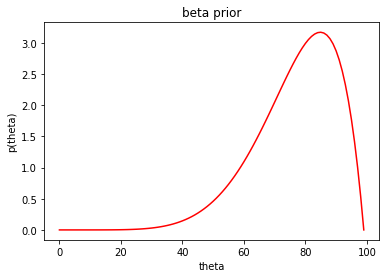

In [0]:
# choose your belief parameter
a= 7; b= 2

prior = beta(a, b)
theta = np.linspace(0,1,100)
plt.plot(prior.pdf(theta), color='r')
plt.title('beta prior')
plt.xlabel('theta')
plt.ylabel('p(theta)')

Text(0, 0.5, 'p(theta)')

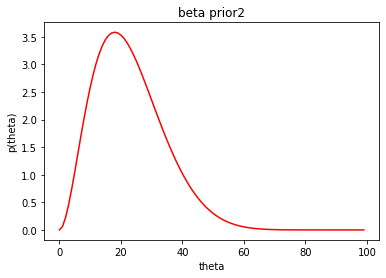

In [0]:
# you can always reflect other belief by tweaking your parameter;
a2= 3; b2= 10

prior2 = beta(a2, b2)
theta = np.linspace(0,1,100)
plt.plot(prior2.pdf(theta), color='r')
plt.title('beta prior2')
plt.xlabel('theta')
plt.ylabel('p(theta)')

(0.0, 0.0005)

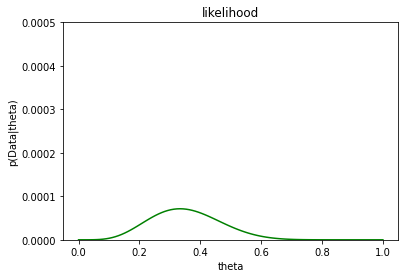

In [0]:
# scipy stats package does not allow for plotting pdf-theta so we need to define formula directly.
def likelihood(D, p):
    N = D.size; suc = D.sum()
    theta = np.linspace(0,1,100)
    return p**suc * (1-p)**(N-suc) # note that we neglected the constant as it will be canceled out in appling Bayes Rule

plt.plot(theta, likelihood(data, theta), color='g')
plt.title("likelihood")
plt.xlabel("theta")
plt.ylabel("p(Data|theta)")
plt.ylim(0,0.0005)

Text(0, 0.5, 'p(theta)')

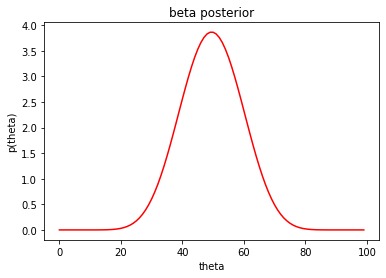

In [0]:
# Belief update
a_pos = a + data.sum()
b_pos = b + data.size - data.sum()

posterior = beta(a_pos, b_pos)
theta = np.linspace(0,1,100)
plt.plot(posterior.pdf(theta), color='r')
plt.title('beta posterior')
plt.xlabel('theta')
plt.ylabel('p(theta)')

(0.0, 4.0)

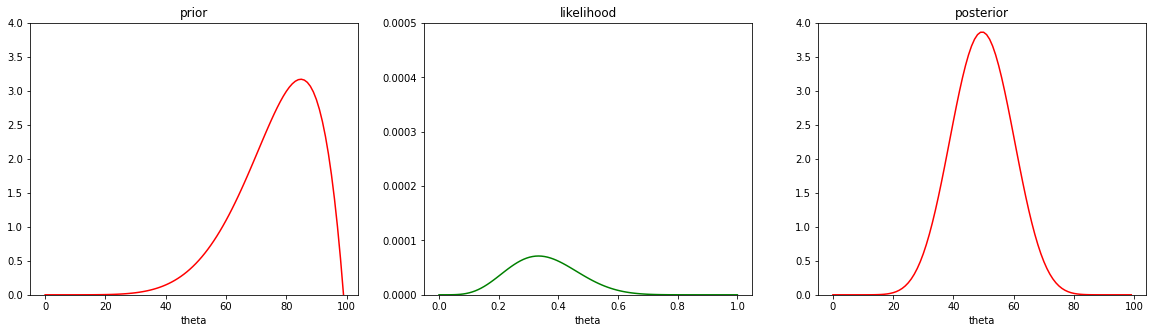

In [0]:
# in a nutshell;
fig = plt.figure(figsize=(20,5))

ax1 = fig.add_subplot(131)
ax1.plot(prior.pdf(theta), color='r')
ax1.set_title('prior')
ax1.set_xlabel('theta')
ax1.set_ylim(0,4)

ax2 = fig.add_subplot(132)
ax2.plot(theta, likelihood(data, theta), color='g')
ax2.set_title('likelihood')
ax2.set_xlabel('theta')
ax2.set_ylim(0,0.0005)

ax3 = fig.add_subplot(133)
ax3.plot(posterior.pdf(theta), color='r')
ax3.set_title('posterior')
ax3.set_xlabel('theta')
ax3.set_ylim(0,4)

In [0]:
from scipy.stats import norm

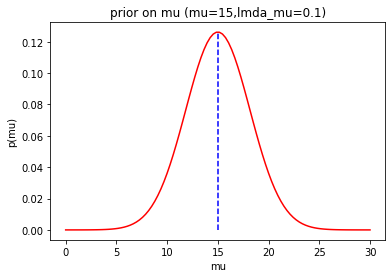

In [0]:
# choose your belief parameter
mu0= 15; lmda_mu0= 0.1

prior = norm(mu0, lmda_mu0**(-1/2))
mu = np.linspace(0,30,100)
plt.plot(mu, prior.pdf(mu), color='r')
plt.title('prior on mu (mu=15,lmda_mu=0.1)')
plt.xlabel('mu')
plt.ylabel('p(mu)')
plt.vlines(mu0, ymin = 0, ymax = np.max(prior.pdf(mu)), colors='blue', linestyles='--')

In [0]:
mu00 = 20
lmda_mu00 = 1
N = 100
np.random.seed(101)
data = norm.rvs(mu00,lmda_mu00**(-1/2), size = N)
mu_ml = np.mean(data)
mu_ml 

20.166369880423115

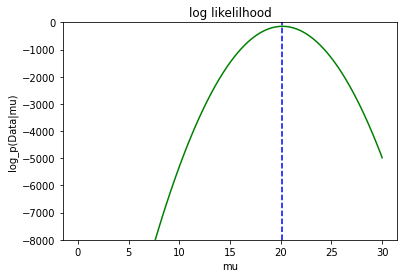

In [0]:
def log_likelihood(a,b) :
    L = 0
    for i in a : 
      L = L + np.log(norm.pdf(i,b,lmda_mu00**(-1/2)))
    return L 

plt.plot(mu, log_likelihood(data,mu), color='g')
plt.title("log likelilhood")
plt.xlabel("mu")
plt.ylabel("log_p(Data|mu)")
plt.ylim(-8000,0)
plt.vlines(mu_ml, ymin = -8000, ymax = 0, colors='blue', linestyles='--')

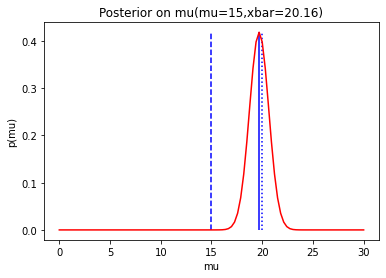

In [0]:
mu_pos = (lmda_mu0*mu0 + lmda_mu00*mu_ml)/(lmda_mu0+lmda_mu00)
lmda_pos = lmda_mu0+lmda_mu00
posterior = norm(mu_pos,lmda_pos**(-1/2))
mu = np.linspace(0,30,100)
plt.plot(mu,posterior.pdf(mu), color='r')
plt.title('Posterior on mu(mu=15,xbar=20.16)')
plt.xlabel('mu')
plt.ylabel('p(mu)')
plt.vlines(mu_pos, ymin=0, ymax=np.max(posterior.pdf(mu)), colors='blue', linestyles='-')
plt.vlines(mu0, ymin=0, ymax=np.max(posterior.pdf(mu)), colors='b', linestyles='--')
plt.vlines(mu00, ymin=0, ymax=np.max(posterior.pdf(mu)), colors='b', linestyles=':')

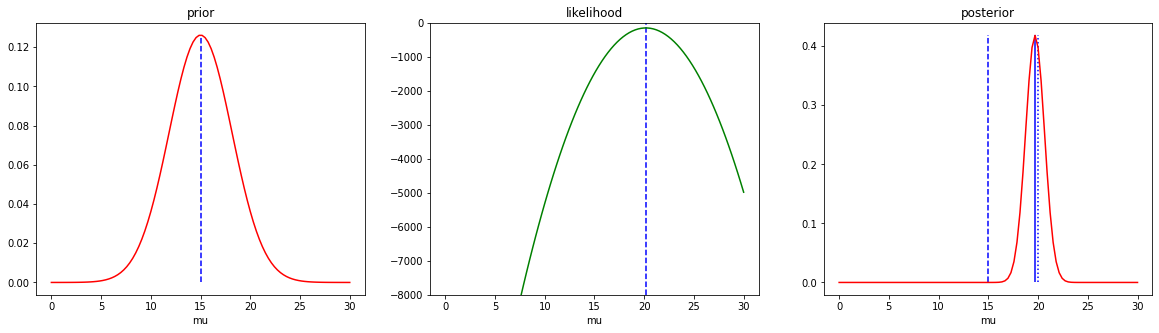

In [0]:
fig = plt.figure(figsize=(20,5))

ax1 = fig.add_subplot(131)
ax1.plot(mu, prior.pdf(mu), color='r')
ax1.set_title('prior')
ax1.set_xlabel('mu')
ax1.vlines(mu0, ymin = 0, ymax = np.max(prior.pdf(mu)), colors='blue', linestyles='--')

ax2 = fig.add_subplot(132)
ax2.plot(mu, log_likelihood(data,mu), color='g')
ax2.set_title('likelihood')
ax2.set_xlabel('mu')
ax2.set_ylim(-8000,0)
ax2.vlines(mu_ml, ymin = -8000, ymax = 0, colors='blue', linestyles='--')

ax3 = fig.add_subplot(133)
ax3.plot(mu,posterior.pdf(mu), color='r')
ax3.set_title('posterior')
ax3.set_xlabel('mu')
ax3.vlines(mu_pos, ymin=0, ymax=np.max(posterior.pdf(mu)), colors='blue', linestyles='-')
ax3.vlines(mu0, ymin=0, ymax=np.max(posterior.pdf(mu)), colors='b', linestyles='--')
ax3.vlines(mu00, ymin=0, ymax=np.max(posterior.pdf(mu)), colors='b', linestyles=':')